In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline

In [2]:
N_ROUNDS = 4
accuracy_table = []
identifier = 'info/shrinked-mnist-residual-network-%d-round-%d'
for N in range(1, 21):
    table = tuple(pickle.load(open(identifier % (N, round), 'r'))[0] for round in range(N_ROUNDS))
    accuracy_table.append(sum(table) / float(N_ROUNDS))

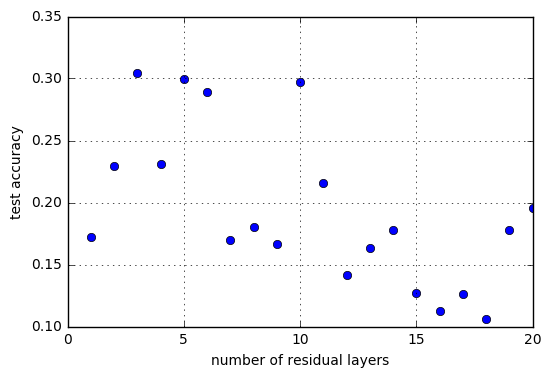

In [3]:
pl.plot(range(1, len(accuracy_table) + 1), accuracy_table, 'bo')
pl.xlabel('number of residual layers')
pl.ylabel('test accuracy')
pl.grid()
# pl.xlim(1, len(accuracy_table))

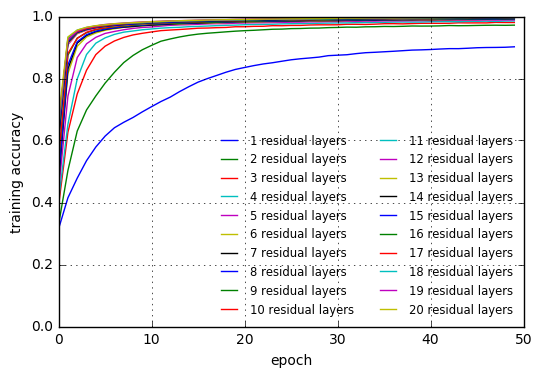

In [4]:
round = 0
identifier = 'info/shrinked-mnist-residual-network-%d-round-%d'
for N in range(1, 21):
    _, progress = pickle.load(open(identifier % (N, round), 'rb'))
    training_accuracy = progress['training_accuracy']
    pl.plot(range(len(training_accuracy)), training_accuracy, label='%d residual layers' % N)
pl.legend(fontsize='small', framealpha=0, loc=0, ncol=2)
pl.grid()
pl.ylim(0, 1)
pl.xlabel('epoch')
pl.ylabel('training accuracy')

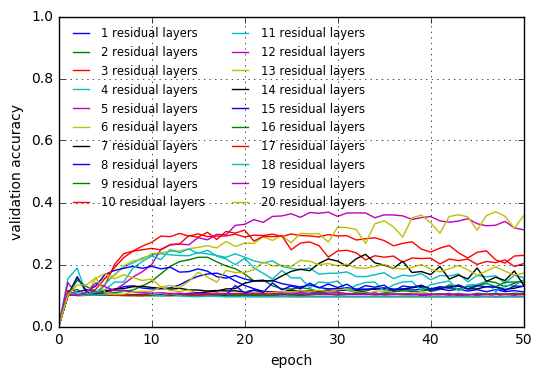

In [5]:
round = 0
identifier = 'info/shrinked-mnist-residual-network-%d-round-%d'
for N in range(1, 21):
    _, progress = pickle.load(open(identifier % (N, round), 'rb'))
    validation_accuracy = progress['validation_accuracy']
    pl.plot(range(len(validation_accuracy)), validation_accuracy, label='%d residual layers' % N)
pl.legend(fontsize='small', framealpha=0, loc=0, ncol=2)
pl.grid()
pl.ylim(0, 1)
pl.xlabel('epoch')
pl.ylabel('validation accuracy')